# DATA PREPROCESSING

# Bank Marketing Data Set

url : https://archive.ics.uci.edu/ml/datasets/bank+marketing#

# Files Information :

###social and economic context attributes

In [180]:
import pandas as pd
import numpy as np

In [181]:
df=pd.read_csv(r'C:\Users\sinha\Desktop\bank/bank.csv',sep=";")

In [182]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [183]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [184]:
def replace_marital(val):
    if val == "single":
        return 0
    else:
        return 1
df["marital"]=df["marital"].apply(replace_marital, 1)

In [185]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [186]:
df["housing"]=df["housing"].map({
    "no":0,
    "yes":1
}.get)

In [187]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [188]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [189]:
#removing outliers..handling missing data
df["job"].replace({ 
    'unknown':np.nan,
    'management':0,
    'technician':1,
    'entrepreneur':2,
    'blue-collar':3,
    'admin.':4,
    'services':5,
    'self-employed':7,
    'unemployed':8,   
    'housemaid':9,
    'student':10,
    
    
}, inplace=True)

In [190]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,5,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [191]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,5,1,secondary,no,-333,1,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7,1,tertiary,yes,-3313,1,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,1,secondary,no,295,0,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3,1,secondary,no,1137,0,no,cellular,6,feb,129,4,211,3,other,no
4520,44,2,0,tertiary,no,1136,1,yes,cellular,3,apr,345,2,249,7,other,no


In [192]:
df["education"].unique()#converting categorical data into numerical data

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [193]:
df["education"].replace({
    'unknown':np.nan,
    'primary':0, 
    'secondary':1, 
    'tertiary':2,
},inplace=True)

In [194]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,5,1,1.0,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,2.0,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,2.0,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [195]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,5,1,1.0,no,-333,1,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7,1,2.0,yes,-3313,1,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,1,1.0,no,295,0,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3,1,1.0,no,1137,0,no,cellular,6,feb,129,4,211,3,other,no
4520,44,2,0,2.0,no,1136,1,yes,cellular,3,apr,345,2,249,7,other,no


In [196]:
df['balance'].min()

-3313

In [197]:
df['balance'].max()

71188

In [198]:
df['balance']=df['balance'].apply(lambda v: (v - df['balance'].min())/(df['balance'].max()-df['balance'].min()))

In [199]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,0.068455,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,5,1,1.0,no,0.108750,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,2.0,no,0.062590,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,2.0,no,0.064281,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,no,0.044469,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [200]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,5,1,1.0,no,0.039999,1,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7,1,2.0,yes,0.000000,1,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,1,1.0,no,0.048429,0,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3,1,1.0,no,0.059731,0,no,cellular,6,feb,129,4,211,3,other,no
4520,44,2,0,2.0,no,0.059717,1,yes,cellular,3,apr,345,2,249,7,other,no


In [201]:
df.contact.replace({"unknown":np.nan,
                   "cellular":1,
                   "telephone":0},inplace=True)

In [202]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,0.068455,0,no,1.0,19,oct,79,1,-1,0,unknown,no
1,33,5,1,1.0,no,0.108750,1,yes,1.0,11,may,220,1,339,4,failure,no
2,35,0,0,2.0,no,0.062590,1,no,1.0,16,apr,185,1,330,1,failure,no
3,30,0,1,2.0,no,0.064281,1,yes,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,no,0.044469,1,no,NaN,5,may,226,1,-1,0,unknown,no


In [203]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,5,1,1.0,no,0.039999,1,no,1.0,30,jul,329,5,-1,0,unknown,no
4517,57,7,1,2.0,yes,0.000000,1,yes,NaN,9,may,153,1,-1,0,unknown,no
4518,57,1,1,1.0,no,0.048429,0,no,1.0,19,aug,151,11,-1,0,unknown,no
4519,28,3,1,1.0,no,0.059731,0,no,1.0,6,feb,129,4,211,3,other,no
4520,44,2,0,2.0,no,0.059717,1,yes,1.0,3,apr,345,2,249,7,other,no


In [204]:
df.contact.unique()

array([ 1., nan,  0.])

In [205]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [206]:
df.month=df.month.map({
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10, 
    'nov':11,
     'dec':12
    
})

In [207]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,0.068455,0,no,1.0,19,10,79,1,-1,0,unknown,no
1,33,5,1,1.0,no,0.108750,1,yes,1.0,11,5,220,1,339,4,failure,no
2,35,0,0,2.0,no,0.062590,1,no,1.0,16,4,185,1,330,1,failure,no
3,30,0,1,2.0,no,0.064281,1,yes,NaN,3,6,199,4,-1,0,unknown,no
4,59,3,1,1.0,no,0.044469,1,no,NaN,5,5,226,1,-1,0,unknown,no


In [208]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [209]:
df.poutcome=df.poutcome.map({
    'unknown':np.nan,
    'failure':0,
    'other':1,
    'success':2
})

In [210]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,0.068455,0,no,1.0,19,10,79,1,-1,0,NaN,no
1,33,5,1,1.0,no,0.108750,1,yes,1.0,11,5,220,1,339,4,0.0,no
2,35,0,0,2.0,no,0.062590,1,no,1.0,16,4,185,1,330,1,0.0,no
3,30,0,1,2.0,no,0.064281,1,yes,NaN,3,6,199,4,-1,0,NaN,no
4,59,3,1,1.0,no,0.044469,1,no,NaN,5,5,226,1,-1,0,NaN,no


In [211]:
df.y.replace({"no":0,"yes":1}, inplace=True)

In [212]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,0.068455,0,no,1.0,19,10,79,1,-1,0,NaN,0
1,33,5,1,1.0,no,0.108750,1,yes,1.0,11,5,220,1,339,4,0.0,0
2,35,0,0,2.0,no,0.062590,1,no,1.0,16,4,185,1,330,1,0.0,0
3,30,0,1,2.0,no,0.064281,1,yes,NaN,3,6,199,4,-1,0,NaN,0
4,59,3,1,1.0,no,0.044469,1,no,NaN,5,5,226,1,-1,0,NaN,0


In [213]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,5,1,1.0,no,0.039999,1,no,1.0,30,7,329,5,-1,0,NaN,0
4517,57,7,1,2.0,yes,0.000000,1,yes,NaN,9,5,153,1,-1,0,NaN,0
4518,57,1,1,1.0,no,0.048429,0,no,1.0,19,8,151,11,-1,0,NaN,0
4519,28,3,1,1.0,no,0.059731,0,no,1.0,6,2,129,4,211,3,1.0,0
4520,44,2,0,2.0,no,0.059717,1,yes,1.0,3,4,345,2,249,7,1.0,0


In [214]:
df.duration=df.duration.apply(lambda v: ((v-df.duration.min()/df.duration.max()-df.duration.min())))

In [215]:
#converted Categorical attributes to numerical attribute
df.describe()

,age,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4334.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,0.735457,1.155053,0.063565,0.566025,0.905849,15.915284,6.166777,259.959969,2.793630,39.766645,0.542579,0.557598,0.115240
std,10.576211,0.441138,0.666325,0.040397,0.495676,0.292084,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.001322,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,0.045395,0.000000,1.000000,9.000000,5.000000,99.998678,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.050429,1.000000,1.000000,16.000000,6.000000,180.998678,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,2.000000,0.064335,1.000000,1.000000,21.000000,8.000000,324.998678,3.000000,-1.000000,0.000000,1.000000,0.000000
max,87.000000,1.000000,2.000000,1.000000,1.000000,1.000000,31.000000,12.000000,3020.998678,50.000000,871.000000,25.000000,2.000000,1.000000


In [216]:
df.to_csv(r'C:\Users\sinha\Desktop\bank\preprocessed.csv',index=False)

In [217]:
new_df=pd.read_csv(r'C:\Users\sinha\Desktop/bank/preprocessed.csv')

In [218]:
new_df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,0.0,no,0.068455,0,no,1.0,19,10,74.998678,1,-1,0,NaN,0
1,33,5,1,1.0,no,0.108750,1,yes,1.0,11,5,215.998678,1,339,4,0.0,0
2,35,0,0,2.0,no,0.062590,1,no,1.0,16,4,180.998678,1,330,1,0.0,0
3,30,0,1,2.0,no,0.064281,1,yes,NaN,3,6,194.998678,4,-1,0,NaN,0
4,59,3,1,1.0,no,0.044469,1,no,NaN,5,5,221.998678,1,-1,0,NaN,0


In [219]:
new_df.corr()

,age,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.410768,-0.190484,0.083820,-0.193888,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
marital,0.410768,1.000000,-0.169967,-0.007525,0.041449,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,-0.190484,-0.169967,1.000000,0.056585,-0.072716,0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.030396,0.023715,0.055368
balance,0.083820,-0.007525,0.056585,1.000000,-0.050227,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,0.041449,-0.072716,-0.050227,1.000000,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
contact,-0.204200,-0.056938,0.117748,-0.036326,0.046484,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,-0.006769,0.017107,-0.008677,-0.031291,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244
month,0.073764,0.061882,0.083234,0.099872,-0.170922,0.014321,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.080557,0.023335
duration,-0.002367,-0.024560,-0.011193,-0.015950,0.015740,0.027292,-0.024629,-0.000282,1.000000,-0.068382,0.010380,0.018080,0.115722,0.401118
campaign,-0.005148,0.008093,0.009714,-0.009976,-0.003574,-0.033973,0.160706,0.059214,-0.068382,1.000000,-0.093137,-0.067833,-0.006457,-0.061147


#negative correleation between housing and balance

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline

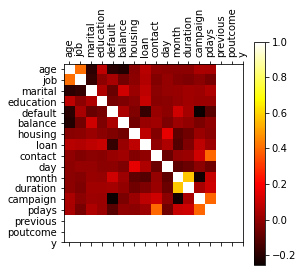

In [221]:
plt.matshow(new_df.corr(), cmap="hot")
plt.colorbar()

plt.xticks(list(range(len(new_df.columns))),new_df.columns, rotation='vertical')
plt.yticks(list(range(len(new_df.columns))),new_df.columns, rotation='horizontal')

plt.show()

In [222]:
new_df.corr()["y"].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
education    0.055368
age          0.045092
month        0.023335
balance      0.017905
contact     -0.002108
day         -0.011244
marital     -0.045815
campaign    -0.061147
housing     -0.104683
Name: y, dtype: float64

sorted from high correlation to low coorelation

([<matplotlib.axis.XTick at 0x1e9f868c3d0>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'job'),
  Text(2, 0, 'marital'),
  Text(3, 0, 'education'),
  Text(4, 0, 'default'),
  Text(5, 0, 'balance'),
  Text(6, 0, 'housing'),
  Text(7, 0, 'loan'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'day'),
  Text(10, 0, 'month'),
  Text(11, 0, 'duration'),
  Text(12, 0, 'campaign'),
  Text(13, 0, 'pdays'),
  Text(14, 0, 'previous'),
  Text(15, 0, 'poutcome'),
  Text(16, 0, 'y')])

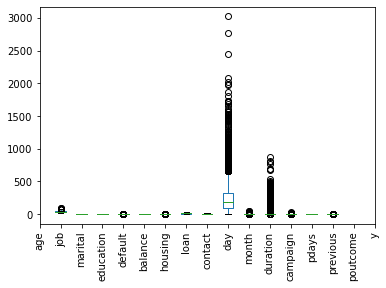

In [223]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))),new_df.columns, rotation='vertical')

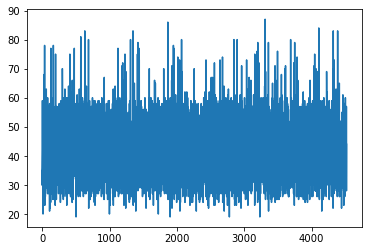

In [224]:
plt.plot(df.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

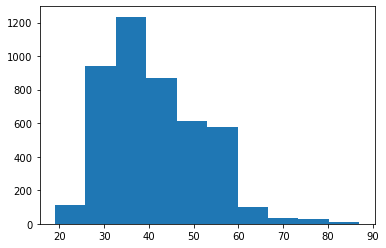

In [225]:
plt.hist(df.age.values)

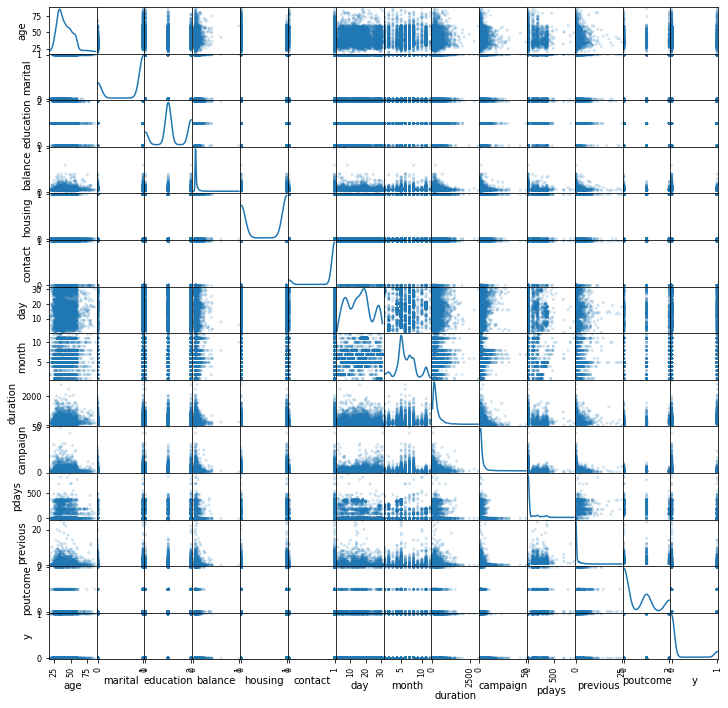

In [226]:
pd.plotting.scatter_matrix(new_df, alpha=0.2, figsize=(12,12), diagonal='kde')
plt.show()

scatter covariance matrix

<AxesSubplot:>

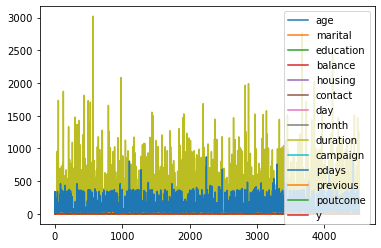

In [227]:
new_df.plot()

In [233]:
#removing outlier
low=0.01
high=0.99
new_df.quantile([low,high])

,age,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,24.0,0.0,0.0,0.035457,0.0,0.0,2.0,1.0,6.198678,1.0,-1.0,0.0,0.0,0.0
0.99,72.0,1.0,2.0,0.234998,1.0,1.0,31.0,11.0,1254.998678,16.0,370.0,8.0,2.0,1.0


In [234]:
qdf=new_df.quantile([low,high])

In [241]:
qdf.age

0.01    24.0
0.99    72.0
Name: age, dtype: float64

In [243]:
qdf.age[low]

24.0

In [252]:
new_df.age=new_df.age.apply(lambda v: v if qdf.age[low]<v< qdf.age[high] else np.nan)

In [253]:
new_df.describe()

,age,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4521.000000,4334.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4428.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,0.735457,1.155053,0.063565,0.566025,0.905849,15.915284,6.166777,248.203285,2.793630,39.766645,0.542579,0.557598,0.115240
std,9.751862,0.441138,0.666325,0.040397,0.495676,0.292084,8.247667,2.378380,217.107570,3.109807,100.121124,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.998678,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,0.045395,0.000000,1.000000,9.000000,5.000000,101.998678,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.050429,1.000000,1.000000,16.000000,6.000000,180.998678,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,2.000000,0.064335,1.000000,1.000000,21.000000,8.000000,320.998678,3.000000,-1.000000,0.000000,1.000000,0.000000
max,71.000000,1.000000,2.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1253.998678,50.000000,871.000000,25.000000,2.000000,1.000000


outliers eliminated

In [254]:
new_df.age.dropna(inplace=True)#drop age which is not a number

In [255]:
new_df.describe()

,age,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4521.000000,4334.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4428.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,0.735457,1.155053,0.063565,0.566025,0.905849,15.915284,6.166777,248.203285,2.793630,39.766645,0.542579,0.557598,0.115240
std,9.751862,0.441138,0.666325,0.040397,0.495676,0.292084,8.247667,2.378380,217.107570,3.109807,100.121124,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.998678,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,0.045395,0.000000,1.000000,9.000000,5.000000,101.998678,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.050429,1.000000,1.000000,16.000000,6.000000,180.998678,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,2.000000,0.064335,1.000000,1.000000,21.000000,8.000000,320.998678,3.000000,-1.000000,0.000000,1.000000,0.000000
max,71.000000,1.000000,2.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1253.998678,50.000000,871.000000,25.000000,2.000000,1.000000


In [256]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8,1,0.0,no,0.068455,0,no,1.0,19,10,74.998678,1,-1,0,NaN,0
1,33.0,5,1,1.0,no,0.108750,1,yes,1.0,11,5,215.998678,1,339,4,0.0,0
2,35.0,0,0,2.0,no,0.062590,1,no,1.0,16,4,180.998678,1,330,1,0.0,0
3,30.0,0,1,2.0,no,0.064281,1,yes,NaN,3,6,194.998678,4,-1,0,NaN,0
4,59.0,3,1,1.0,no,0.044469,1,no,NaN,5,5,221.998678,1,-1,0,NaN,0


In [257]:
new_df.age.unique()#checking the age does'nt contain any outlier

array([30., 33., 35., 59., 36., 39., 41., 43., nan, 31., 40., 56., 37.,
       25., 38., 42., 44., 26., 55., 67., 53., 68., 32., 49., 52., 34.,
       61., 45., 48., 57., 54., 63., 51., 29., 50., 27., 60., 28., 58.,
       46., 47., 70., 65., 64., 62., 66., 71., 69.])

In [260]:
new_df.cov()

,age,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,95.098806,1.710818,-1.183271,0.030235,-0.844954,-0.455416,-1.633041,1.708845,-46.962040,-0.083784,-19.596998,-0.335006,0.187671,0.051717
marital,1.710818,0.194603,-0.050009,-0.000134,0.009063,-0.007486,-0.024628,0.064926,-1.988310,0.011102,-0.913959,-0.026565,-0.003355,-0.006454
education,-1.183271,-0.050009,0.443989,0.001524,-0.023981,0.022508,0.093661,0.131709,-2.193922,0.020258,0.767853,0.034476,0.011456,0.011808
balance,0.030235,-0.000134,0.001524,0.001632,-0.001006,-0.000438,-0.002891,0.009596,-0.036279,-0.001253,0.038168,0.001792,0.000618,0.000231
housing,-0.844954,0.009063,-0.023981,-0.001006,0.245695,0.006790,-0.127923,-0.201501,2.045872,-0.005509,5.801141,0.032420,-0.091682,-0.016571
contact,-0.455416,-0.007486,0.022508,-0.000438,0.006790,0.085313,-0.131600,0.011419,2.407653,-0.030056,0.800179,0.000938,-0.008153,-0.000216
day,-1.633041,-0.024628,0.093661,-0.002891,-0.127923,-0.131600,68.024016,1.577849,-39.254286,4.121894,-77.912251,-0.825706,0.117800,-0.029616
month,1.708845,0.064926,0.131709,0.009596,-0.201501,0.011419,1.577849,5.656692,-0.987422,0.437965,-26.670808,-0.150687,0.187474,0.017723
duration,-46.962040,-1.988310,-2.193922,-0.036279,2.045872,2.407653,-39.254286,-0.987422,47135.697002,-54.009642,377.156206,9.378774,23.536921,26.361720
campaign,-0.083784,0.011102,0.020258,-0.001253,-0.005509,-0.030056,4.121894,0.437965,-54.009642,9.670897,-28.998832,-0.357251,-0.007667,-0.060726


In [267]:
new_df.to_csv(r'C:\Users\sinha\Desktop\bank\preprocessed.csv',index=False)

In [294]:
# importing various package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

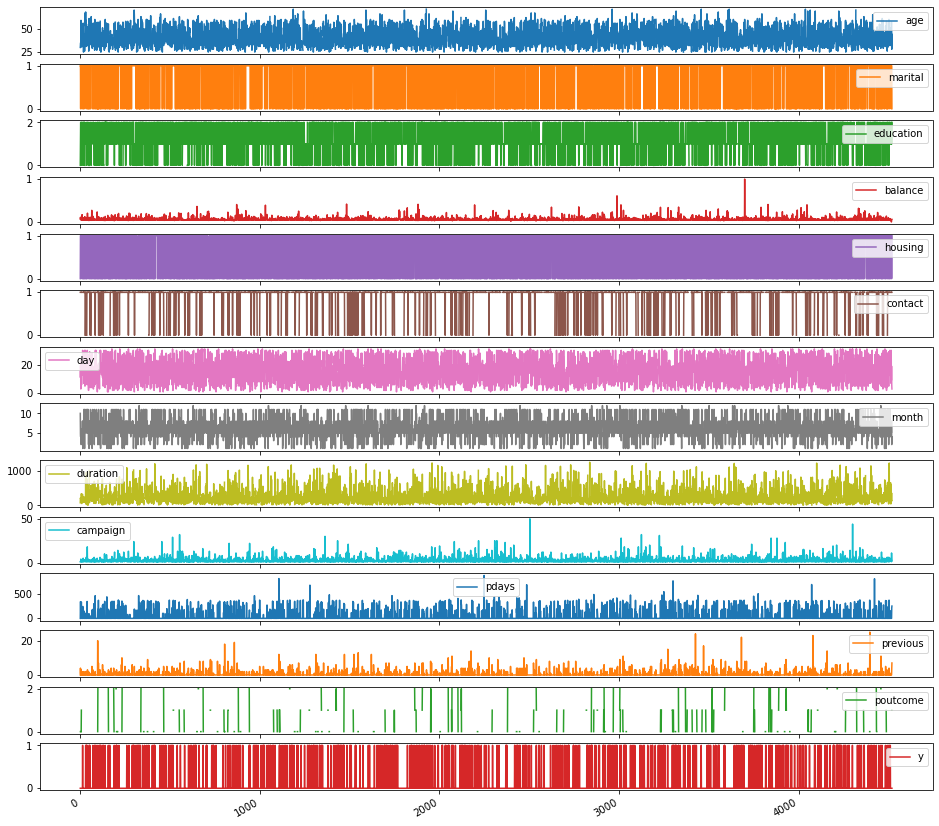

In [295]:
new_df.plot(subplots=True,figsize=(16,16))

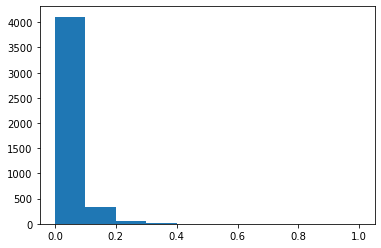

In [303]:
plt.hist(new_df.balance.values)
plt.show()

In [304]:
new_df.y.unique()

array([0, 1], dtype=int64)

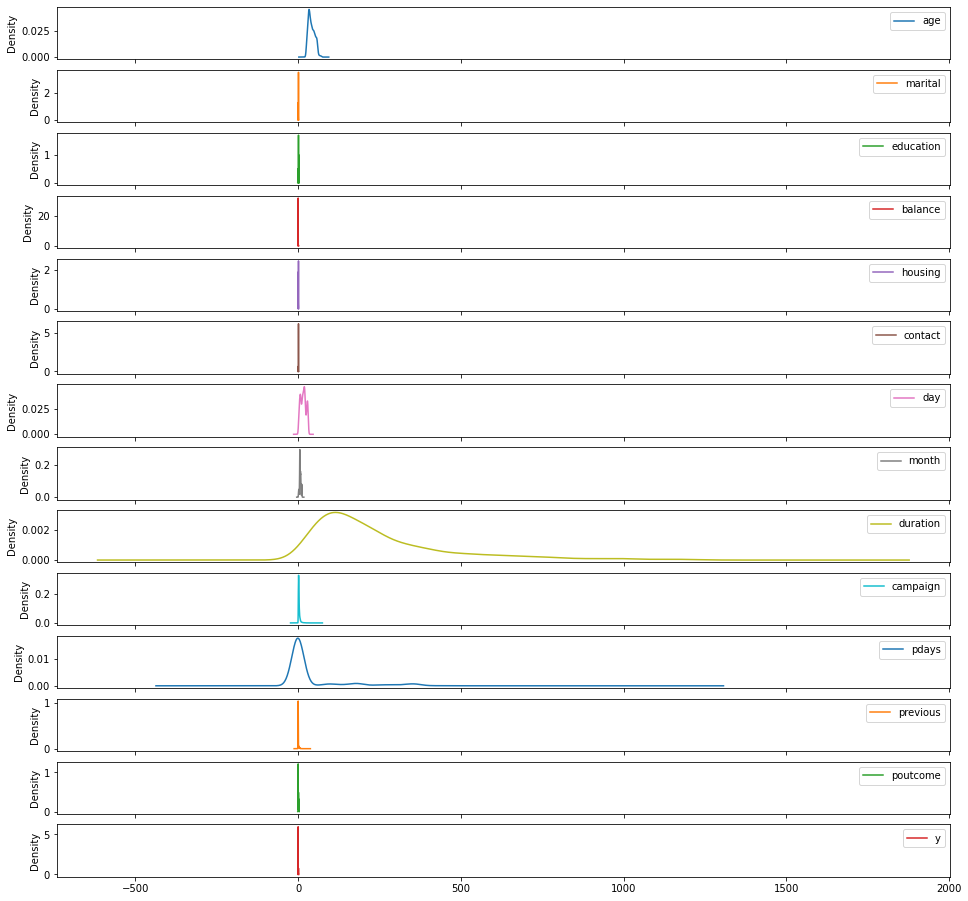

In [306]:
new_df.plot.kde(subplots=True,figsize=(16,16))
plt.show()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

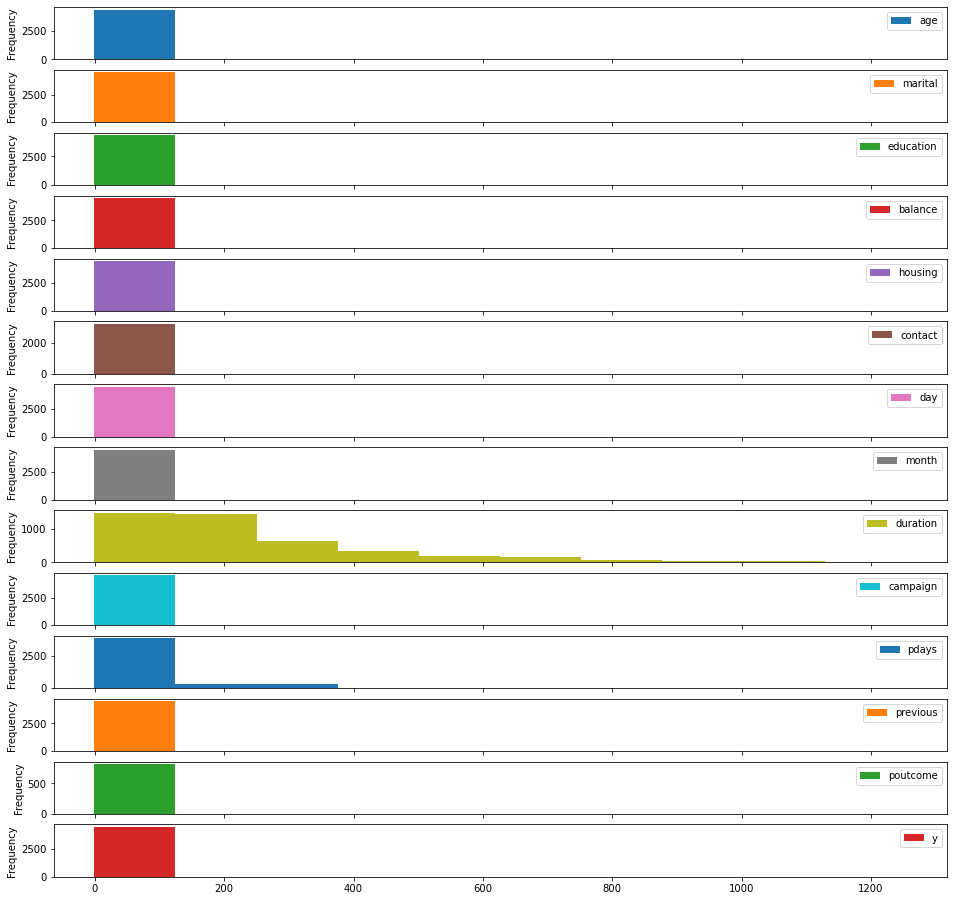

In [307]:
new_df.plot.hist(subplots=True, figsize=(16,16))

In [320]:
#import Serial libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [324]:
banking = pd.read_csv(r'C:\Users\sinha\Desktop/bank/preprocessed.csv')

In [325]:
banking.shape

(4521, 17)

For this data set, (4521, 17) should be printed. This represents 17 columns and 4521 rows.

In [326]:
banking.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8,1,0.0,no,0.068455,0,no,1.0,19,10,74.998678,1,-1,0,NaN,0
1,33.0,5,1,1.0,no,0.108750,1,yes,1.0,11,5,215.998678,1,339,4,0.0,0
2,35.0,0,0,2.0,no,0.062590,1,no,1.0,16,4,180.998678,1,330,1,0.0,0
3,30.0,0,1,2.0,no,0.064281,1,yes,NaN,3,6,194.998678,4,-1,0,NaN,0
4,59.0,3,1,1.0,no,0.044469,1,no,NaN,5,5,221.998678,1,-1,0,NaN,0


In [327]:
banking.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33.0,5,1,1.0,no,0.039999,1,no,1.0,30,7,324.998678,5,-1,0,NaN,0
4517,57.0,7,1,2.0,yes,0.000000,1,yes,NaN,9,5,148.998678,1,-1,0,NaN,0
4518,57.0,1,1,1.0,no,0.048429,0,no,1.0,19,8,146.998678,11,-1,0,NaN,0
4519,28.0,3,1,1.0,no,0.059731,0,no,1.0,6,2,124.998678,4,211,3,1.0,0
4520,44.0,2,0,2.0,no,0.059717,1,yes,1.0,3,4,340.998678,2,249,7,1.0,0


<AxesSubplot:xlabel='age'>

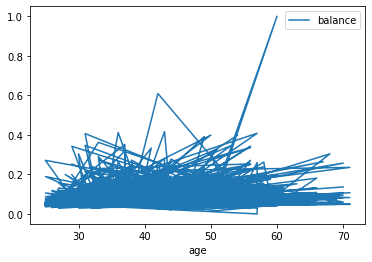

In [330]:
banking.plot("age", "balance")

<AxesSubplot:xlabel='duration', ylabel='balance'>

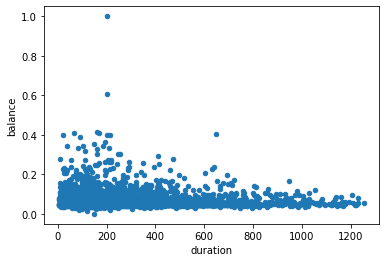

In [331]:
banking.plot.scatter("duration", "balance")

In [332]:
x_train, x_test, y_train, y_test = train_test_split(banking.age, banking.balance, test_size = 0.2)

In [356]:
x_train.replace([np.inf,-np.inf],np.nan,inplace=True)
    

In [357]:
y_train.replace([np.inf,-np.inf],np.nan,inplace=True)

In [393]:
np.any(np.isnan(x_train))

False

In [392]:
x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])

In [389]:
regr = LinearRegression()

In [390]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [394]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [395]:
preds

array([0.06202321, 0.06472106, 0.06973135, 0.06240862, 0.05932536,
       0.06317943, 0.06741891, 0.06240862, 0.0670335 , 0.06780432,
       0.07050217, 0.07281461, 0.05971077, 0.06433565, 0.06395025,
       0.06433565, 0.07011676, 0.06086699, 0.06395025, 0.06240862,
       0.06317943, 0.06086699, 0.0616378 , 0.06086699, 0.06395025,
       0.06472106, 0.06395025, 0.06741891, 0.06973135, 0.06202321,
       0.06549188, 0.06317943, 0.06009618, 0.05816914, 0.06857513,
       0.06472106, 0.0670335 , 0.06472106, 0.06472106, 0.06356484,
       0.06240862, 0.06587728, 0.06934595, 0.07165839, 0.06395025,
       0.06741891, 0.07011676, 0.07397083, 0.06395025, 0.06009618,
       0.06896054, 0.06857513, 0.06240862, 0.05971077, 0.0616378 ,
       0.06472106, 0.06202321, 0.06086699, 0.0666481 , 0.06472106,
       0.06279403, 0.07088757, 0.06780432, 0.06472106, 0.0616378 ,
       0.06279403, 0.07088757, 0.05816914, 0.07127298, 0.06973135,
       0.06009618, 0.05855455, 0.06317943, 0.0670335 , 0.05971

In [396]:
residuals = preds - y_test

In [398]:
residuals.head(1)

303    0.000279
Name: balance, dtype: float64

(array([  2.,   0.,   2.,   3.,   4.,  15.,  39., 133., 701.,   6.]),
 array([-0.288463  , -0.25256649, -0.21666997, -0.18077345, -0.14487694,
        -0.10898042, -0.0730839 , -0.03718738, -0.00129087,  0.03460565,
         0.07050217]),
 <BarContainer object of 10 artists>)

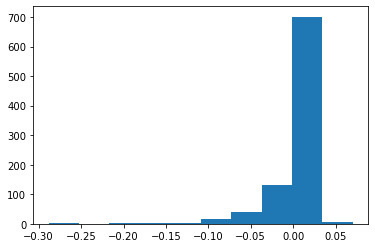

In [399]:
plt.hist(residuals)

In [402]:
mean_squared_error(y_test, preds) ** 0.5

0.030595796716242858

# logistic regression

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(banking.age, banking.balance, test_size = 0.2, random_state=0)


In [441]:
x_train.replace([np.inf,-np.inf],np.nan,inplace=True)
y_train.replace([np.inf,-np.inf],np.nan,inplace=True)

In [442]:
x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
y_test[np.isnan(y_test)] = np.median(y_test[~np.isnan(y_test)])

In [443]:
np.any(np.isnan(x_train))

True

In [445]:
#logreg = LogisticRegression()
#logreg.fit(x_test, y_test)